In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns 
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfs = pd.read_html('https://www.worldfootball.net/schedule/bra-serie-a-2013-spieltag/1/', header = 0)
df = dfs[3]
for j in range(2013,2021):
    for i in range(1,39):
        dfs = pd.read_html(f'https://www.worldfootball.net/schedule/bra-serie-a-{j}-spieltag/{i}/', header = 0)
        df = pd.concat([df,dfs[3]])

In [3]:
df_final = df.tail(-20)

In [4]:
df_final

,#,Team,Team.1,M.,W,D,L,goals,Dif.,Pt.
0,1.0,NaN,Cruzeiro,1,1,0,0,5:0,5,3
1,2.0,NaN,Grêmio Porto Alegre,1,1,0,0,2:0,2,3
2,3.0,NaN,Vasco da Gama,1,1,0,0,1:0,1,3
3,4.0,NaN,São Paulo FC,1,1,0,0,2:0,2,3
4,5.0,NaN,Coritiba FC,1,1,0,0,2:1,1,3
...,...,...,...,...,...,...,...,...,...,...
15,16.0,NaN,Fortaleza,38,10,11,17,34:44,-10,41
16,17.0,NaN,Vasco da Gama,38,10,11,17,37:56,-19,41
17,18.0,NaN,Goiás,38,9,10,19,41:63,-22,37
18,19.0,NaN,Coritiba FC,38,7,10,21,31:54,-23,31


In [5]:
df_final.drop(['Team'], inplace=True, axis=1)
df_final.rename(index=str, columns={'#': 'Posicao', 'Team.1': 'Time', 'M.': 'Rodada_atual', 'W': 'Vitorias',
                              'D': 'Empates', 'L': 'Derrotas', 'goals': 'Gols',
                               'Dif.': 'Saldo_gols', 'Pt.': 'Pontuacao'}, inplace=True)

In [6]:
df_final['Temporada'] = 0
df_final.iloc[0:760,9] = 2013
df_final.iloc[760:1520,9] = 2014
df_final.iloc[1520:2280,9] = 2015
df_final.iloc[2280:3040,9] = 2016
df_final.iloc[3040:3800,9] = 2017
df_final.iloc[3800:4560,9] = 2018
df_final.iloc[4560:5320,9] = 2019
df_final.iloc[5320:6080,9] = 2020

In [7]:
pd.set_option('display.max_rows', 10)

In [8]:
df_final['Posicao'] = pd.to_numeric(df_final.index) + 1

In [9]:
dfs2 = pd.read_html('https://pt.wikipedia.org/wiki/Lista_dos_20_primeiros_colocados_do_Ranking_Nacional_de_Clubes_por_ano', header =None)
df2 = dfs2[1]
for i in range(2,8):
    df2 = pd.concat([df2,dfs2[i]])

In [10]:
df2.drop(['Pos..1','UF'], inplace=True, axis=1)
df2.rename(index=int, columns={'Pos.':'Posicao','Clube':'Time'},inplace=True)
df2['Time'] = np.where(df2['Time']=='Palmeiras e Cruzeiro','Palmeiras',df2['Time'])

In [11]:
nova_linha = ['1º','Cruzeiro',15288]
def Insert_row_(row_number, df, row_value):
    # Slice the upper half of the dataframe
    df1 = df[0:row_number]
   
    # Store the result of lower half of the dataframe
    df2 = df[row_number:]
   
    # Inser the row in the upper half dataframe
    df1.loc[row_number]=row_value
   
    # Concat the two dataframes
    df_result = pd.concat([df1, df2])
   
    # Reassign the index labels
    df_result.index = [*range(df_result.shape[0])]
   
    # Return the updated dataframe
    return df_result
df2 = Insert_row_(101, df2, nova_linha)

In [12]:
df2['Time'] = np.where(df2['Time']=='Atlético Paranaense','Athletico Paranaense',df2['Time'])

In [13]:
df2['Temporada'] = 0
df2.iloc[0:20,3] = 2013
df2.iloc[20:40,3] = 2014
df2.iloc[40:60,3] = 2015
df2.iloc[60:80,3] = 2016
df2.iloc[80:100,3] = 2017
df2.iloc[100:120,3] = 2018
df2.iloc[120:,3] = 2019

In [14]:
def add_ranking(time1,time2):
    for i in range(2013,2020):
        aux = int(df2.loc[(df2['Time']==time2) & (df2['Temporada']== i),'Pontos'])
        df_final.loc[(df_final['Time']==time1) & (df_final['Temporada']== i),'Ranking_cbf'] = aux
def add_ranking2(time1,time2,ano):
    aux = int(df2.loc[(df2['Time']==time2) & (df2['Temporada']== ano),'Pontos'])
    df_final.loc[(df_final['Time']==time1) & (df_final['Temporada']== ano),'Ranking_cbf'] = aux

In [15]:
df_final['Ranking_cbf'] = 0
add_ranking('Fluminense RJ','Fluminense')
add_ranking('Corinthians SP','Corinthians')
add_ranking('Vasco da Gama','Vasco da Gama')
add_ranking('São Paulo FC','São Paulo')
add_ranking('Grêmio Porto Alegre','Grêmio')
add_ranking('Internacional','Internacional')
add_ranking('Flamengo RJ','Flamengo')
add_ranking('Palmeiras','Palmeiras')
add_ranking('Santos FC','Santos')
add_ranking('Botafogo - RJ','Botafogo')
add_ranking('Vitória - BA','Vitória')
add_ranking2('Goiás','Goiás',2013)
add_ranking2('Goiás','Goiás',2014)
add_ranking2('Goiás','Goiás',2015)
add_ranking2('Bahia - BA','Bahia',2013)
add_ranking2('Bahia - BA','Bahia',2014)
add_ranking2('Bahia - BA','Bahia',2019)
add_ranking('Cruzeiro','Cruzeiro')
add_ranking('Coritiba FC','Coritiba')
add_ranking('Atlético Mineiro','Atlético Mineiro')
add_ranking('Athletico Paranaense','Athletico Paranaense')
add_ranking2('Figueirense - SC','Figueirense',2016)
add_ranking2('Chapecoense','Chapecoense',2017)
add_ranking2('Chapecoense','Chapecoense',2018)
add_ranking2('Chapecoense','Chapecoense',2019)
add_ranking2('Sport - PE','Sport',2015)
add_ranking2('Sport - PE','Sport',2016)
add_ranking2('Sport - PE','Sport',2017)
add_ranking2('Sport - PE','Sport',2018)
add_ranking2('Ponte Preta','Ponte Preta',2015)
add_ranking2('Ponte Preta','Ponte Preta',2016)
add_ranking2('Ponte Preta','Ponte Preta',2017)

In [16]:
df_final.loc[(df_final['Time']=='Goiás') & (df_final['Temporada']== 2019),'Ranking_cbf'] = 6168

df_final.loc[(df_final['Time']=='Bahia - BA') & (df_final['Temporada']== 2017),'Ranking_cbf'] = 6698
df_final.loc[(df_final['Time']=='Bahia - BA') & (df_final['Temporada']== 2018),'Ranking_cbf'] = 6647

df_final.loc[(df_final['Time']=='Atlético Goianiense') & (df_final['Temporada']== 2017),'Ranking_cbf'] = 5443

df_final.loc[(df_final['Time']=='Figueirense - SC') & (df_final['Temporada']== 2014),'Ranking_cbf'] = 6248
df_final.loc[(df_final['Time']=='Figueirense - SC') & (df_final['Temporada']== 2015),'Ranking_cbf'] = 6898

df_final.loc[(df_final['Time']=='Chapecoense') & (df_final['Temporada']== 2014),'Ranking_cbf'] = 3557
df_final.loc[(df_final['Time']=='Chapecoense') & (df_final['Temporada']== 2015),'Ranking_cbf'] = 5150
df_final.loc[(df_final['Time']=='Chapecoense') & (df_final['Temporada']== 2016),'Ranking_cbf'] = 6336

df_final.loc[(df_final['Time']=='América - MG') & (df_final['Temporada']== 2016),'Ranking_cbf'] = 5202
df_final.loc[(df_final['Time']=='América - MG') & (df_final['Temporada']== 2018),'Ranking_cbf'] = 6255

df_final.loc[(df_final['Time']=='Sport - PE') & (df_final['Temporada']== 2014),'Ranking_cbf'] = 6740

df_final.loc[(df_final['Time']=='Avaí - SC') & (df_final['Temporada']== 2015),'Ranking_cbf'] = 6364
df_final.loc[(df_final['Time']=='Avaí - SC') & (df_final['Temporada']== 2017),'Ranking_cbf'] = 5894
df_final.loc[(df_final['Time']=='Avaí - SC') & (df_final['Temporada']== 2019),'Ranking_cbf'] = 6394

df_final.loc[(df_final['Time']=='Ponte Preta') & (df_final['Temporada']== 2013),'Ranking_cbf'] = 7600

df_final.loc[(df_final['Time']=='Portuguesa - SP') & (df_final['Temporada']== 2013),'Ranking_cbf'] = 7840

df_final.loc[(df_final['Time']=='Ceará - CE') & (df_final['Temporada']== 2018),'Ranking_cbf'] = 5553
df_final.loc[(df_final['Time']=='Ceará - CE') & (df_final['Temporada']== 2019),'Ranking_cbf'] = 6274

df_final.loc[(df_final['Time']=='CSA - AL') & (df_final['Temporada']== 2019),'Ranking_cbf'] = 2850

df_final.loc[(df_final['Time']=='Náutico - PE') & (df_final['Temporada']== 2013),'Ranking_cbf'] = 8036

df_final.loc[(df_final['Time']=='Joinville - SC') & (df_final['Temporada']== 2015),'Ranking_cbf'] = 4699

df_final.loc[(df_final['Time']=='Paraná Clube') & (df_final['Temporada']== 2018),'Ranking_cbf'] = 5244

df_final.loc[(df_final['Time']=='Santa Cruz - PE') & (df_final['Temporada']== 2016),'Ranking_cbf'] = 4310

df_final.loc[(df_final['Time']=='Criciúma - SC') & (df_final['Temporada']== 2013),'Ranking_cbf'] = 4370
df_final.loc[(df_final['Time']=='Criciúma - SC') & (df_final['Temporada']== 2014),'Ranking_cbf'] = 5818

df_final.loc[(df_final['Time']=='Fortaleza') & (df_final['Temporada']== 2019),'Ranking_cbf'] = 4222


In [17]:
# ranking de clubes da cbf em 2020
df_final.loc[(df_final['Time']=='São Paulo FC') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 10526
df_final.loc[(df_final['Time']=='Sport - PE') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 7237
df_final.loc[(df_final['Time']=='Bahia - BA') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 10719
df_final.loc[(df_final['Time']=='Atlético Mineiro') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 13096
df_final.loc[(df_final['Time']=='Grêmio Porto Alegre') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 15160
df_final.loc[(df_final['Time']=='Santos FC') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 13944
df_final.loc[(df_final['Time']=='Internacional') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 12204
df_final.loc[(df_final['Time']=='Athletico Paranaense') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 13466
df_final.loc[(df_final['Time']=='Vasco da Gama') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 9242
df_final.loc[(df_final['Time']=='Atlético Goianiense') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 5834
df_final.loc[(df_final['Time']=='Corinthians SP') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 13084
df_final.loc[(df_final['Time']=='Red Bull Bragantino') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 4145 
df_final.loc[(df_final['Time']=='Ceará - CE') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 6751
df_final.loc[(df_final['Time']=='Botafogo - RJ') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 9640
df_final.loc[(df_final['Time']=='Coritiba FC') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 5958
df_final.loc[(df_final['Time']=='Flamengo RJ') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 15428
df_final.loc[(df_final['Time']=='Fluminense RJ') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 9938
df_final.loc[(df_final['Time']=='Fortaleza') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 6585
df_final.loc[(df_final['Time']=='Goiás') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 6703
df_final.loc[(df_final['Time']=='Palmeiras') & (df_final['Temporada']== 2020),'Ranking_cbf'] = 16640

In [18]:
def add_valor(time,ano,valor):
    df_final.loc[(df_final['Time']==time) & (df_final['Temporada']== ano),'Valor_time'] = valor

In [19]:
# valor do time em 15/09/20 - transfermarkt
df_final['Valor_time'] = 0
df_final.loc[(df_final['Time']=='São Paulo FC') & (df_final['Temporada']== 2020),'Valor_time'] = 59.35
df_final.loc[(df_final['Time']=='Sport - PE') & (df_final['Temporada']== 2020),'Valor_time'] = 15.78
df_final.loc[(df_final['Time']=='Bahia - BA') & (df_final['Temporada']== 2020),'Valor_time'] = 25.45
df_final.loc[(df_final['Time']=='Atlético Mineiro') & (df_final['Temporada']== 2020),'Valor_time'] = 63.9
df_final.loc[(df_final['Time']=='Grêmio Porto Alegre') & (df_final['Temporada']== 2020),'Valor_time'] = 82.45
df_final.loc[(df_final['Time']=='Santos FC') & (df_final['Temporada']== 2020),'Valor_time'] = 48.05
df_final.loc[(df_final['Time']=='Internacional') & (df_final['Temporada']== 2020),'Valor_time'] = 66
df_final.loc[(df_final['Time']=='Athletico Paranaense') & (df_final['Temporada']== 2020),'Valor_time'] = 49.03
df_final.loc[(df_final['Time']=='Vasco da Gama') & (df_final['Temporada']== 2020),'Valor_time'] = 27
df_final.loc[(df_final['Time']=='Atlético Goianiense') & (df_final['Temporada']== 2020),'Valor_time'] = 13.58
df_final.loc[(df_final['Time']=='Corinthians SP') & (df_final['Temporada']== 2020),'Valor_time'] = 67.95
df_final.loc[(df_final['Time']=='Red Bull Bragantino') & (df_final['Temporada']== 2020),'Valor_time'] = 36.73
df_final.loc[(df_final['Time']=='Ceará - CE') & (df_final['Temporada']== 2020),'Valor_time'] = 16.8
df_final.loc[(df_final['Time']=='Botafogo - RJ') & (df_final['Temporada']== 2020),'Valor_time'] = 16.78
df_final.loc[(df_final['Time']=='Coritiba FC') & (df_final['Temporada']== 2020),'Valor_time'] = 14.5
df_final.loc[(df_final['Time']=='Flamengo RJ') & (df_final['Temporada']== 2020),'Valor_time'] = 122.85
df_final.loc[(df_final['Time']=='Fluminense RJ') & (df_final['Temporada']== 2020),'Valor_time'] = 37.23
df_final.loc[(df_final['Time']=='Fortaleza') & (df_final['Temporada']== 2020),'Valor_time'] = 16.45
df_final.loc[(df_final['Time']=='Goiás') & (df_final['Temporada']== 2020),'Valor_time'] = 7.8
df_final.loc[(df_final['Time']=='Palmeiras') & (df_final['Temporada']== 2020),'Valor_time'] = 105.2

In [20]:
time_valor_2019 = {'São Paulo FC':72.2, 'Atlético Mineiro':50.4, 'Chapecoense':28.75, 
       'Flamengo RJ':104.75,'Grêmio Porto Alegre':71.35, 'Ceará - CE':19.68, 'Bahia - BA':38.55,
       'Athletico Paranaense':35.3, 'Palmeiras':134.55, 'Fluminense RJ':35.45,
       'Internacional':57.7, 'Corinthians SP':65.7, 'CSA - AL':25.58, 'Cruzeiro':55.58,
       'Avaí - SC':12.25, 'Fortaleza':22.65, 'Vasco da Gama':38.05, 'Goiás':21.8, 'Santos FC':79.88,
       'Botafogo - RJ':30.95}
for time in time_valor_2019:
    add_valor(f'{time}',2019,time_valor_2019[time])

In [21]:
time_valor_2018 = {'Cruzeiro':62.25, 'Vitória - BA':43.9, 'Santos FC':68, 'América - MG':27.35,
       'Vasco da Gama':41.58, 'Corinthians SP':61.4, 'Internacional':55.75,
       'Athletico Paranaense':37.65, 'Botafogo - RJ':25.55, 'São Paulo FC':70.88,
       'Bahia - BA':34.9, 'Flamengo RJ':67.38, 'Paraná Clube':18.48, 'Atlético Mineiro':61.35,
       'Chapecoense':32.03, 'Fluminense RJ':30.8, 'Ceará - CE':27.7, 'Palmeiras':88.33,
       'Grêmio Porto Alegre':67.6, 'Sport - PE':30.95}
for time in time_valor_2018:
    add_valor(f'{time}',2018,time_valor_2018[time])

In [22]:
time_valor_2017 = {'Flamengo RJ':84.08, 'Corinthians SP':49.5, 'Fluminense RJ':36.55, 'Palmeiras':67.4,
       'Cruzeiro':74.83, 'Bahia - BA':34.25, 'Ponte Preta':33.45, 'Avaí - SC':4.9,
       'Grêmio Porto Alegre':59.45, 'Coritiba FC':30.08, 'Santos FC':54.35,
       'Atlético Goianiense':14.9, 'Chapecoense':36.93, 'Vasco da Gama':35.85,
       'Atlético Mineiro':78.1, 'Athletico Paranaense':43.68, 'Vitória - BA':38.75,
       'Botafogo - RJ':30.2, 'Sport - PE':42.9, 'São Paulo FC':92.05}
for time in time_valor_2017:
    add_valor(f'{time}',2017,time_valor_2017[time])

In [23]:
time_valor_2016 = {'Flamengo RJ':55.55, 'Palmeiras':69.95, 'Atlético Mineiro':62.55, 'Coritiba FC':19.6,
       'Botafogo - RJ':12.65, 'Santa Cruz - PE':10.65, 'Corinthians SP':48.2,
       'Figueirense - SC':20.95, 'América - MG':30.15, 'Internacional':43.6, 'Ponte Preta':28.15,
       'Fluminense RJ':53.85, 'Cruzeiro':54.85, 'Santos FC':36, 'Athletico Paranaense':40.73,
       'Vitória - BA':23.45, 'São Paulo FC':62.95, 'Grêmio Porto Alegre':54.53,
       'Chapecoense':35.2, 'Sport - PE':42.5}
for time in time_valor_2016:
    add_valor(f'{time}',2016,time_valor_2016[time])

In [24]:
time_valor_2015 = {'Palmeiras':59.15, 'Chapecoense':6.75, 'Fluminense RJ':52.35, 'Grêmio Porto Alegre':31.35,
       'São Paulo FC':88.8, 'Cruzeiro':58.65, 'Athletico Paranaense':12.5, 'Sport - PE':20.85,
       'Vasco da Gama':17.4, 'Avaí - SC':9.65, 'Coritiba FC':15.85, 'Goiás':7.25,
       'Corinthians SP':52.85, 'Figueirense - SC':12.15, 'Santos FC':20.03, 'Flamengo RJ':34.45,
       'Atlético Mineiro':53.78, 'Ponte Preta':7.7, 'Internacional':55.5,
       'Joinville - SC':4.6}
for time in time_valor_2015:
    add_valor(f'{time}',2015,time_valor_2015[time])

In [25]:
time_valor_2014 = {'Fluminense RJ':39.15, 'Internacional':19.75, 'Chapecoense':4.4, 'São Paulo FC':93.15,
       'Athletico Paranaense':9.05, 'Atlético Mineiro':50.95, 'Bahia - BA':16.75,
       'Flamengo RJ':29.1, 'Santos FC':42.35, 'Criciúma - SC':13.85, 'Coritiba FC':17.6,
       'Palmeiras':20.1, 'Botafogo - RJ':23.45, 'Corinthians SP':62.85, 'Cruzeiro':41.95,
       'Vitória - BA':12.55, 'Sport - PE':8.3, 'Grêmio Porto Alegre':30.1,
       'Figueirense - SC':5.2, 'Goiás':4.25}
for time in time_valor_2014:
    add_valor(f'{time}',2014,time_valor_2014[time])

In [26]:
time_valor_2013 = {'Vasco da Gama':27.2, 'Vitória - BA':17.88, 'Corinthians SP':84.55,
       'Grêmio Porto Alegre':77.65, 'Ponte Preta':13.78, 'Criciúma - SC':15.1, 'Santos FC':103.75,
       'Fluminense RJ':68.15, 'Cruzeiro':55.25, 'Coritiba FC':31.4, 'Athletico Paranaense':15.85,
       'Botafogo - RJ':36, 'São Paulo FC':115.8, 'Flamengo RJ':44.45, 'Bahia - BA':24.05,
       'Náutico - PE':14.1, 'Goiás':8.65, 'Internacional':62.3, 'Atlético Mineiro':46.1,
       'Portuguesa - SP':16.5}
for time in time_valor_2013:
    add_valor(f'{time}',2013,time_valor_2013[time])

In [27]:
aux = df_final['Gols'].str.split(':', n = 1, expand = True)
df_final['Gols_marcados'] = aux[0] 
df_final['Gols_sofridos'] = aux[1] 
df_final = df_final.drop(columns=['Gols'])

In [28]:
df_aux = df_final.copy()

In [29]:
taxa_gols = []
aux1 = df_final['Gols_marcados'].values
aux2 = df_final['Gols_sofridos'].values
linhas = df_final.shape[0]
for i in range(0,linhas):
    if int(aux2[i]) != 0:
        divisao = int(aux1[i])/int(aux2[i])
    else:
        divisao = 1
    divisao = np.round(divisao,3)
    taxa_gols.append(divisao)
df_final = df_final.assign(Taxa_gols = taxa_gols)

In [30]:
aproveitamento = []
linhas = df_final.shape[0]
aux1 = df_final['Pontuacao'].values
pont_max = df_final['Rodada_atual'].values*3
for i in range(0,linhas):
    aproveitamento.append(aux1[i]/pont_max[i])
df_final = df_final.assign(Aproveitamento = aproveitamento)

In [31]:
df_final['Gols_marcados'] = df_final['Gols_marcados'].astype(int)
df_final['Gols_sofridos'] = df_final['Gols_sofridos'].astype(int)

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6080 entries, 0 to 19
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Posicao         6080 non-null   int64  
 1   Time            6080 non-null   object 
 2   Rodada_atual    6080 non-null   int64  
 3   Vitorias        6080 non-null   int64  
 4   Empates         6080 non-null   int64  
 5   Derrotas        6080 non-null   int64  
 6   Saldo_gols      6080 non-null   int64  
 7   Pontuacao       6080 non-null   int64  
 8   Temporada       6080 non-null   int64  
 9   Ranking_cbf     6080 non-null   int64  
 10  Valor_time      6080 non-null   float64
 11  Gols_marcados   6080 non-null   int32  
 12  Gols_sofridos   6080 non-null   int32  
 13  Taxa_gols       6080 non-null   float64
 14  Aproveitamento  6080 non-null   float64
dtypes: float64(3), int32(2), int64(9), object(1)
memory usage: 712.5+ KB


In [33]:
df_final

,Posicao,Time,Rodada_atual,Vitorias,Empates,Derrotas,Saldo_gols,Pontuacao,Temporada,Ranking_cbf,Valor_time,Gols_marcados,Gols_sofridos,Taxa_gols,Aproveitamento
0,1,Cruzeiro,1,1,0,0,5,3,2013,13096,55.25,5,0,1.000,1.000000
1,2,Grêmio Porto Alegre,1,1,0,0,2,3,2013,14460,77.65,2,0,1.000,1.000000
2,3,Vasco da Gama,1,1,0,0,1,3,2013,15030,27.20,1,0,1.000,1.000000
3,4,São Paulo FC,1,1,0,0,2,3,2013,14786,115.80,2,0,1.000,1.000000
4,5,Coritiba FC,1,1,0,0,1,3,2013,12804,31.40,2,1,2.000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Fortaleza,38,10,11,17,-10,41,2020,6585,16.45,34,44,0.773,0.359649
16,17,Vasco da Gama,38,10,11,17,-19,41,2020,9242,27.00,37,56,0.661,0.359649
17,18,Goiás,38,9,10,19,-22,37,2020,6703,7.80,41,63,0.651,0.324561
18,19,Coritiba FC,38,7,10,21,-23,31,2020,5958,14.50,31,54,0.574,0.271930


In [34]:
df_final.to_csv('dados_tabela.csv', index=False)

# Machine Learning

In [35]:
pd.set_option('display.max_rows', 12)
def select_kbest_clf(data_frame, target, k='all'):
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["Atributo"] = data_frame.drop(target, axis=1).columns
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["Valor p"] = feat_selector.pvalues_
    
    return feat_scores
df_aux = df_final.drop(['Time','Posicao'],1)
kbest_feat = select_kbest_clf(df_aux, 'Pontuacao', k='all')
kbest_feat = kbest_feat.sort_values(["F Score", "Valor p"], ascending=[False, False])
kbest_feat

,Atributo,F Score,Valor p
1,Vitorias,3271.011794,0.000000e+00
8,Gols_marcados,733.626103,0.000000e+00
0,Rodada_atual,343.539516,0.000000e+00
2,Empates,105.094883,0.000000e+00
9,Gols_sofridos,80.300852,0.000000e+00
3,Derrotas,44.046458,0.000000e+00
4,Saldo_gols,37.318279,0.000000e+00
11,Aproveitamento,35.337747,0.000000e+00
10,Taxa_gols,9.212155,1.995943e-106
7,Valor_time,6.751738,2.872166e-70


In [36]:
pontuacao = df_final['Pontuacao']
atributos = df_final.drop(['Time','Pontuacao','Vitorias','Empates','Rodada_atual','Derrotas','Posicao','Temporada'],1)

In [37]:
corr = df_final.drop(['Time'],1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Posicao,Rodada_atual,Vitorias,Empates,Derrotas,Saldo_gols,Pontuacao,Temporada,Ranking_cbf,Valor_time,Gols_marcados,Gols_sofridos,Taxa_gols,Aproveitamento
Posicao,1.000,0.000,-0.474,0.024,0.453,-0.807,-0.408,0.000,-0.522,-0.493,-0.320,0.266,-0.718,-0.872
Rodada_atual,0.000,1.000,0.829,0.849,0.820,-0.000,0.884,0.000,0.000,-0.000,0.878,0.902,-0.065,0.017
Vitorias,-0.474,0.829,1.000,0.622,0.425,0.501,0.988,-0.008,0.268,0.255,0.941,0.598,0.281,0.407
Empates,0.024,0.849,0.622,1.000,0.585,0.012,0.735,0.022,0.010,0.047,0.715,0.726,-0.060,-0.021
Derrotas,0.453,0.820,0.425,0.585,1.000,-0.503,0.484,-0.008,-0.272,-0.285,0.530,0.915,-0.382,-0.351
Saldo_gols,-0.807,-0.000,0.501,0.012,-0.503,1.000,0.435,0.001,0.518,0.508,0.395,-0.331,0.653,0.652
Pontuacao,-0.408,0.884,0.988,0.735,0.484,0.435,1.000,0.002,0.233,0.231,0.954,0.660,0.232,0.351
Temporada,0.000,0.000,-0.008,0.022,-0.008,0.001,0.002,1.000,-0.111,0.182,-0.002,-0.003,0.034,0.021
Ranking_cbf,-0.522,0.000,0.268,0.010,-0.272,0.518,0.233,-0.111,1.000,0.674,0.182,-0.195,0.422,0.433
Valor_time,-0.493,-0.000,0.255,0.047,-0.285,0.508,0.231,0.182,0.674,1.000,0.199,-0.170,0.451,0.421


In [38]:
scaler = StandardScaler()
atrib_norm = scaler.fit_transform(atributos)
atrib_norm=pd.DataFrame(atrib_norm)
atrib_norm.columns = atributos.columns

In [39]:
atrib_norm

,Saldo_gols,Ranking_cbf,Valor_time,Gols_marcados,Gols_sofridos,Taxa_gols,Aproveitamento
0,0.477618,0.642549,0.521053,-1.223153,-1.608318,-0.173871,3.381998
1,0.193180,1.044819,1.370306,-1.427033,-1.608318,-0.173871,3.381998
2,0.098368,1.212924,-0.542408,-1.494993,-1.608318,-0.173871,3.381998
3,0.193180,1.140963,2.816689,-1.427033,-1.608318,-0.173871,3.381998
4,0.098368,0.556432,-0.383173,-1.427033,-1.538499,1.336606,3.381998
...,...,...,...,...,...,...,...
6075,-0.944569,-1.277673,-0.949973,0.747681,1.463697,-0.516749,-0.577621
6076,-1.797882,-0.494072,-0.549991,0.951560,2.301519,-0.685923,-0.577621
6077,-2.082319,-1.242873,-1.277921,1.223399,2.790249,-0.701027,-0.794586
6078,-2.177132,-1.462588,-1.023904,0.543801,2.161882,-0.817334,-1.120034


In [40]:
X_train = atrib_norm[:4560] # 2013-2018
X_test = atrib_norm[4560:5320] # 2019
d_train = pontuacao[:4560] # 2013-2018
d_test = pontuacao[4560:5320] # 2019

Regressão Linear

In [41]:
model_reg_linear = LinearRegression()
model_reg_linear.fit(X_train,d_train)

LinearRegression()

In [42]:
#Calculando a acurácia do treinamento
y_hat_train = model_reg_linear.predict(X_train)
r2 = r2_score(d_train, y_hat_train)
RSME = np.sqrt(mean_squared_error(d_train, y_hat_train))
print(f'R²: {r2:.3}')
print(f'RSME: {RSME:.3}')

R²: 0.914
RSME: 4.95


In [43]:
#Calculando a acurácia do teste
y_hat_test = model_reg_linear.predict(X_test)
r2 = r2_score(d_test, y_hat_test)
RSME = np.sqrt(mean_squared_error(d_test, y_hat_test))
print(f'R²: {r2:.3}')
print(f'RSME: {RSME:.3}')

R²: 0.92
RSME: 5.07


,Score
Gols_marcados,9.401056
Gols_sofridos,6.103852
Saldo_gols,4.826720
Aproveitamento,1.761871
Ranking_cbf,0.945899
Valor_time,-0.410781
Taxa_gols,-0.825314


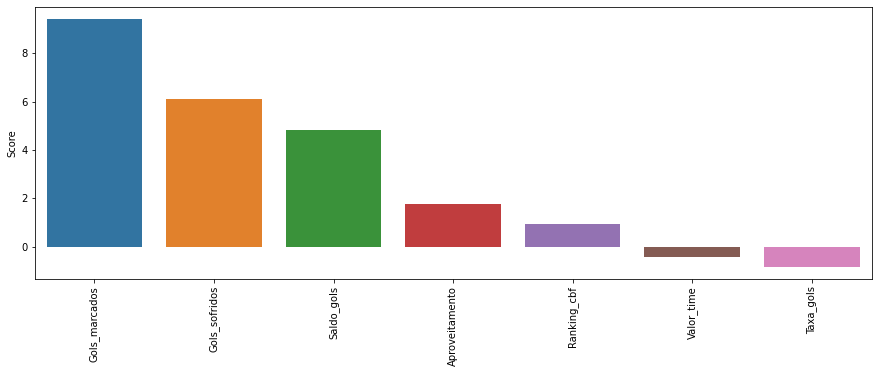

In [44]:
importancia = model_reg_linear.coef_[:]
importancia_features = pd.DataFrame(importancia, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
importancia_features.columns = ['Score']
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features['Score'])
ax.tick_params(axis='x', rotation=90)

Árvore de decisão

In [45]:
arvore = DecisionTreeRegressor()
arvore.fit(X_train, d_train)

DecisionTreeRegressor()

In [46]:
#Calculando a acurácia do teste
y_hat_test = arvore.predict(X_test)
r2 = r2_score(d_test, y_hat_test)
RSME = np.sqrt(mean_squared_error(d_test, y_hat_test))
print(f'R²: {r2:.3}')
print(f'RSME: {RSME:.3}')

R²: 0.903
RSME: 5.58


,Score
Gols_marcados,0.892652
Aproveitamento,0.046939
Ranking_cbf,0.024790
Valor_time,0.018881
Taxa_gols,0.006141
Saldo_gols,0.005382
Gols_sofridos,0.005215


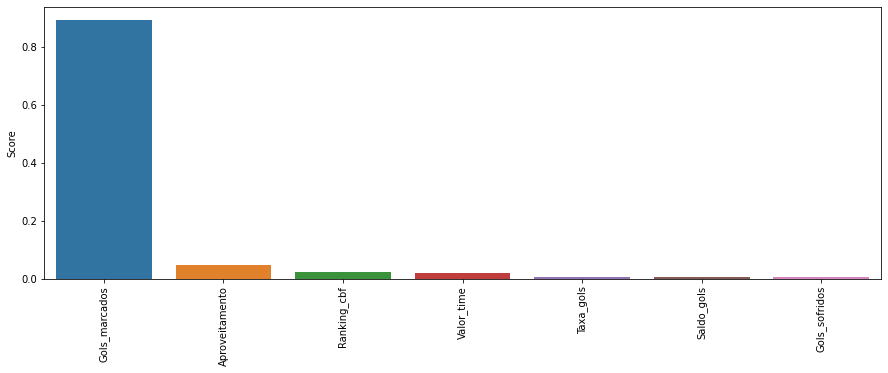

In [47]:
importancia = arvore.feature_importances_
importancia_features = pd.DataFrame(importancia, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
importancia_features.columns = ['Score']
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features['Score'])
ax.tick_params(axis='x', rotation=90)

Random Forest

In [48]:
floresta = RandomForestRegressor(n_estimators = 100)
floresta.fit(X_train, d_train)

RandomForestRegressor()

In [49]:
#Calculando a acurácia do teste
y_hat_test = floresta.predict(X_test)
r2 = r2_score(d_test, y_hat_test)
RSME = np.sqrt(mean_squared_error(d_test, y_hat_test))
print(f'R²: {r2:.3}')
print(f'RSME: {RSME:.3}')

R²: 0.944
RSME: 4.24


,Score
Gols_marcados,0.895663
Aproveitamento,0.048217
Ranking_cbf,0.022854
Valor_time,0.016376
Gols_sofridos,0.006609
Taxa_gols,0.005973
Saldo_gols,0.004307


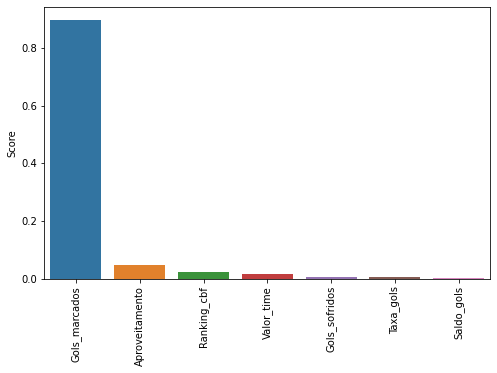

In [50]:
importancia = floresta.feature_importances_
importancia_features = pd.DataFrame(importancia, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
importancia_features.columns = ['Score']
display(importancia_features)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features['Score'])
ax.tick_params(axis='x', rotation=90)

In [51]:
model_XGBR = XGBRegressor()
model_XGBR.fit(X_train, d_train,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
#Calculando a acurácia do teste
y_hat_test = model_XGBR.predict(X_test)
r2 = r2_score(d_test, y_hat_test)
RSME = np.sqrt(mean_squared_error(d_test, y_hat_test))
print(f'R²: {r2:.3}')
print(f'RSME: {RSME:.3}')

R²: 0.937
RSME: 4.49


,Score
Gols_marcados,0.895663
Aproveitamento,0.048217
Ranking_cbf,0.022854
Valor_time,0.016376
Gols_sofridos,0.006609
Taxa_gols,0.005973
Saldo_gols,0.004307


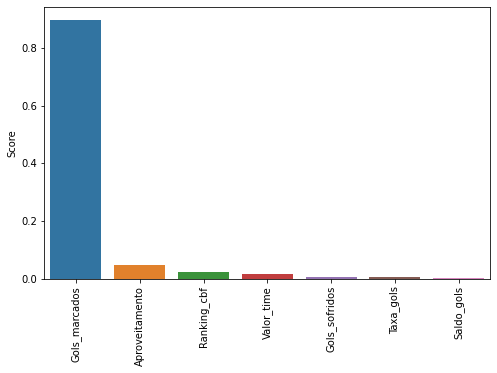

In [53]:
importancia_features = model_XGBR.get_booster().get_score(importance_type='weight')
importancia_features = pd.DataFrame(importancia, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
importancia_features.columns = ['Score']
display(importancia_features)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features['Score'])
ax.tick_params(axis='x', rotation=90)

In [54]:
def rodada(numero):
    rodada = df_final.loc[(df_final['Rodada_atual']==numero) & (df_final['Temporada']== 2020)]
    rodada = rodada.drop(['Time','Pontuacao','Vitorias','Empates','Rodada_atual','Derrotas','Posicao','Temporada'],1)
    scaler = StandardScaler()
    rodada_norm = scaler.fit_transform(rodada)
    rodada_norm=pd.DataFrame(rodada_norm)
    rodada_norm.columns = rodada.columns
    return rodada_norm

In [55]:
def times_x(numero):
    times = df_final.loc[(df_final['Rodada_atual']==numero)& (df_final['Temporada']== 2020),'Time']
    times = pd.DataFrame(times)
    times.rename(columns={0: 'Time'}, inplace=True)
    return times
times = times_x(23)

In [56]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html(index=False).replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

Tabela final - Regressão linear

In [57]:
y_pred = model_reg_linear.predict(rodada(32))
y_pred = pd.DataFrame(np.round(y_pred,0))
y_pred = y_pred + np.round(np.std(y_pred),0)
y_pred = y_pred.astype(int)
pred_table_rl = pd.concat([times.reset_index(), y_pred.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_rl['index'] = np.arange(1,21)
pred_table_rl.columns = ['Posicao', 'Time', 'Pontos']

Tabela final - Árvore de decisão

In [58]:
y_pred = arvore.predict(rodada(32))
y_pred = pd.DataFrame(np.round(y_pred,0))
y_pred = y_pred + np.round(np.std(y_pred),0)
y_pred = y_pred.astype(int)
pred_table_arvore = pd.concat([times.reset_index(), y_pred.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_arvore['index'] = np.arange(1,21)
pred_table_arvore.columns = ['Posicao', 'Time', 'Pontos']

Tabela final - Random Forest

In [59]:
y_pred = floresta.predict(rodada(32))
y_pred = pd.DataFrame(np.round(y_pred,0))
y_pred = y_pred + np.round(np.std(y_pred),0)
y_pred = y_pred.astype(int)
pred_table_floresta = pd.concat([times.reset_index(), y_pred.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_floresta['index'] = np.arange(1,21)
pred_table_floresta.columns = ['Posicao', 'Time', 'Pontos']

Tabela final - XGBoost

In [60]:
y_pred = model_XGBR.predict(rodada(32))
y_pred = pd.DataFrame(np.round(y_pred,0))
y_pred = y_pred + np.round(np.std(y_pred),0)
y_pred = y_pred.astype(int)
pred_table_XGBR = pd.concat([times.reset_index(), y_pred.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_XGBR['index'] = np.arange(1,21)
pred_table_XGBR.columns = ['Posicao', 'Time', 'Pontos']

In [61]:
display_side_by_side(pred_table_rl,pred_table_arvore,pred_table_floresta,pred_table_XGBR, titles=['Regressao Linear','Arvore de decisao','Random Forest','XGBoost'])

Posicao,Time,Pontos
1,Flamengo RJ,65
2,Palmeiras,63
3,São Paulo FC,55
4,Atlético Mineiro,53
5,Fluminense RJ,49
6,Ceará - CE,48
7,Grêmio Porto Alegre,47
8,Sport - PE,43
9,Corinthians SP,43
10,Internacional,43


# Fazendo previsão brasileirão 2021

In [62]:
df_2021_aux = pd.read_html('https://www.worldfootball.net/schedule/bra-serie-a-2021-spieltag/12/', header = 0)
df_2021 = df_2021_aux[3]

In [63]:
df_2021.drop(['Team'], inplace=True, axis=1)
df_2021.rename(index=str, columns={'#': 'Posicao', 'Team.1': 'Time', 'M.': 'Rodada_atual', 'W': 'Vitorias',
                              'D': 'Empates', 'L': 'Derrotas', 'goals': 'Gols',
                               'Dif.': 'Saldo_gols', 'Pt.': 'Pontuacao'}, inplace=True)
df_2021['Posicao'] = pd.to_numeric(df_2021.index) + 1

In [64]:
df_2021['Ranking_2021'] = 0
df_2021.loc[df_2021['Time']=='São Paulo FC','Ranking_2021'] = 11870
df_2021.loc[df_2021['Time']=='Sport - PE','Ranking_2021'] = 7043
df_2021.loc[df_2021['Time']=='Bahia - BA','Ranking_2021'] = 10175
df_2021.loc[df_2021['Time']=='Atlético Mineiro','Ranking_2021'] = 11789
df_2021.loc[df_2021['Time']=='Grêmio Porto Alegre','Ranking_2021'] = 15180
df_2021.loc[df_2021['Time']=='Santos FC','Ranking_2021'] = 12776
df_2021.loc[df_2021['Time']=='Internacional','Ranking_2021'] = 13310
df_2021.loc[df_2021['Time']=='Athletico Paranaense','Ranking_2021'] = 12968
df_2021.loc[df_2021['Time']=='Atlético Goianiense','Ranking_2021'] = 7310
df_2021.loc[df_2021['Time']=='Corinthians SP','Ranking_2021'] = 12032
df_2021.loc[df_2021['Time']=='Red Bull Bragantino','Ranking_2021'] = 6332 
df_2021.loc[df_2021['Time']=='Ceará - CE','Ranking_2021'] = 9128
df_2021.loc[df_2021['Time']=='Flamengo RJ','Ranking_2021'] = 16768
df_2021.loc[df_2021['Time']=='Fluminense RJ','Ranking_2021'] = 9666
df_2021.loc[df_2021['Time']=='Fortaleza','Ranking_2021'] = 8086
df_2021.loc[df_2021['Time']=='Palmeiras','Ranking_2021'] = 16110
df_2021.loc[df_2021['Time']=='Juventude - RS','Ranking_2021'] = 5725
df_2021.loc[df_2021['Time']=='Cuiabá - MT','Ranking_2021'] = 5679
df_2021.loc[df_2021['Time']=='América - MG','Ranking_2021'] = 8404
df_2021.loc[df_2021['Time']=='Chapecoense','Ranking_2021'] = 8985

In [65]:
df_2021['Valor_time_mi'] = 0
df_2021.loc[df_2021['Time']=='São Paulo FC','Valor_time_mi'] = 78.3
df_2021.loc[df_2021['Time']=='Sport - PE','Valor_time_mi'] = 20.5
df_2021.loc[df_2021['Time']=='Bahia - BA','Valor_time_mi'] = 21.93
df_2021.loc[df_2021['Time']=='Atlético Mineiro','Valor_time_mi'] = 85.65
df_2021.loc[df_2021['Time']=='Grêmio Porto Alegre','Valor_time_mi'] = 95.75
df_2021.loc[df_2021['Time']=='Santos FC','Valor_time_mi'] = 69.98
df_2021.loc[df_2021['Time']=='Internacional','Valor_time_mi'] = 69.85
df_2021.loc[df_2021['Time']=='Athletico Paranaense','Valor_time_mi'] = 54.7
df_2021.loc[df_2021['Time']=='Juventude - RS','Valor_time_mi'] = 13.5
df_2021.loc[df_2021['Time']=='Atlético Goianiense','Valor_time_mi'] = 14.98
df_2021.loc[df_2021['Time']=='Corinthians SP','Valor_time_mi'] = 56.05
df_2021.loc[df_2021['Time']=='Red Bull Bragantino','Valor_time_mi'] = 61.03
df_2021.loc[df_2021['Time']=='Ceará - CE','Valor_time_mi'] = 18.7
df_2021.loc[df_2021['Time']=='Chapecoense','Valor_time_mi'] = 15.03
df_2021.loc[df_2021['Time']=='Cuiabá - MT','Valor_time_mi'] = 16.1
df_2021.loc[df_2021['Time']=='Flamengo RJ','Valor_time_mi'] = 152.95
df_2021.loc[df_2021['Time']=='Fluminense RJ','Valor_time_mi'] = 74.68
df_2021.loc[df_2021['Time']=='Fortaleza','Valor_time_mi'] = 21.98
df_2021.loc[df_2021['Time']=='América - MG','Valor_time_mi'] = 12.9
df_2021.loc[df_2021['Time']=='Palmeiras','Valor_time_mi'] = 147.85

In [66]:
aux = df_2021['Gols'].str.split(':', n = 1, expand = True)
df_2021['Gols_marcados'] = aux[0] 
df_2021['Gols_sofridos'] = aux[1] 
df_2021 = df_2021.drop(columns=['Gols'])

In [67]:
taxa_gols = []
aux1 = df_2021['Gols_marcados'].values
aux2 = df_2021['Gols_sofridos'].values
linhas = df_2021.shape[0]
for i in range(0,linhas):
    if int(aux2[i]) != 0:
        divisao = int(aux1[i])/int(aux2[i])
    else:
        divisao = 1
    divisao = np.round(divisao,3)
    taxa_gols.append(divisao)
df_2021 = df_2021.assign(Taxa_gols = taxa_gols)

In [68]:
aproveitamento = []
linhas = df_2021.shape[0]
aux1 = df_2021['Pontuacao'].values
pont_max = df_2021['Rodada_atual'].values*3
for i in range(0,linhas):
    aproveitamento.append(aux1[i]/pont_max[i])
df_2021 = df_2021.assign(Aproveitamento = aproveitamento)

In [69]:
df_2021['Gols_marcados'] = df_2021['Gols_marcados'].astype(int)
df_2021['Gols_sofridos'] = df_2021['Gols_sofridos'].astype(int)

In [70]:
df_2021_aux = df_2021.drop(['Time','Pontuacao','Vitorias','Empates','Rodada_atual','Derrotas','Posicao'],1)
df_2021_norm = scaler.fit_transform(df_2021_aux)
df_2021_norm=pd.DataFrame(df_2021_norm)
df_2021_norm.columns = df_2021_aux.columns
times = df_2021['Time']
times = pd.DataFrame(times)
times.rename(columns={0: 'Time'}, inplace=True)

Tabela final - Regressão Linear

In [71]:
y_pred_rl = model_reg_linear.predict(df_2021_norm)
y_pred_rl = pd.DataFrame(np.round(y_pred_rl,0))
y_pred_rl = y_pred_rl + np.round(np.std(y_pred_rl),0)
y_pred_rl = y_pred_rl.astype(int)
pred_table_rl = pd.concat([times.reset_index(), y_pred_rl.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_rl['index'] = np.arange(1,21)
pred_table_rl.columns = ['Posicao', 'Time', 'Pontos']

Tabela final - Árvore de decisão

In [72]:
y_pred_arvore = arvore.predict(df_2021_norm)
y_pred_arvore = pd.DataFrame(np.round(y_pred_arvore,0))
y_pred_arvore = y_pred_arvore + np.round(np.std(y_pred_arvore),0)
y_pred_arvore = y_pred_arvore.astype(int)
pred_table_arvore = pd.concat([times.reset_index(), y_pred_arvore.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_arvore['index'] = np.arange(1,21)
pred_table_arvore.columns = ['Posicao', 'Time', 'Pontos']

Tabela final - Random Forest

In [73]:
y_pred_floresta = floresta.predict(df_2021_norm)
y_pred_floresta = pd.DataFrame(np.round(y_pred_floresta,0))
y_pred_floresta = y_pred_floresta + np.round(np.std(y_pred_floresta),0)
y_pred_floresta = y_pred_floresta.astype(int)
pred_table_floresta = pd.concat([times.reset_index(), y_pred.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_floresta['index'] = np.arange(1,21)
pred_table_floresta.columns = ['Posicao', 'Time', 'Pontos']

Tabela final - XGBoost

In [74]:
y_pred_XGBR = model_XGBR.predict(df_2021_norm)
y_pred_XGBR = pd.DataFrame(np.round(y_pred_XGBR,0))
y_pred_XGBR = y_pred_XGBR + np.round(np.std(y_pred_XGBR),0)
y_pred_XGBR = y_pred_XGBR.astype(int)
pred_table_XGBR = pd.concat([times.reset_index(), y_pred.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_XGBR['index'] = np.arange(1,21)
pred_table_XGBR.columns = ['Posicao', 'Time', 'Pontos']

In [75]:
display_side_by_side(pred_table_rl,pred_table_arvore,pred_table_floresta,pred_table_XGBR, titles=['Regressao Linear','Arvore de decisao','Random Forest','XGBoost'])

Posicao,Time,Pontos
1,Red Bull Bragantino,69
2,Palmeiras,68
3,Bahia - BA,59
4,Athletico Paranaense,55
5,Fortaleza,52
6,Santos FC,47
7,Flamengo RJ,46
8,Atlético Mineiro,45
9,Chapecoense,42
10,Ceará - CE,41


In [76]:
y_pred_total = (y_pred_rl + y_pred_arvore + y_pred_floresta + y_pred_XGBR)/4
y_pred_total = y_pred_total.astype(int)
pred_table_final = pd.concat([times.reset_index(), y_pred_total.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table_final['index'] = np.arange(1,21)
pred_table_final.columns = ['Posicao', 'Time', 'Pontos']
display_side_by_side(pred_table_final, titles=['Tabela Final'])

Posicao,Time,Pontos
1,Palmeiras,76
2,Red Bull Bragantino,75
3,Athletico Paranaense,62
4,Fortaleza,61
5,Bahia - BA,59
6,Flamengo RJ,54
7,Atlético Mineiro,51
8,Santos FC,49
9,Ceará - CE,45
10,Cuiabá - MT,40


In [77]:
final_prediction = y_pred
std_error = np.std(y_pred)
current_points = df_final.loc[(df_final['Rodada_atual']==15) & (df_final['Temporada']== 2020),'Pontuacao']
max_possible_points = []
for i in range (0,21):
    max_possible_points.append(45)

In [78]:
std_error = np.std(y_pred)
std_error

0    17.780537
dtype: float64

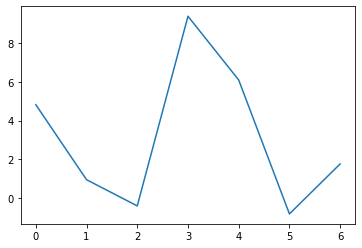

In [79]:
plt.plot(model_reg_linear.coef_)

In [80]:
X_train

,Saldo_gols,Ranking_cbf,Valor_time,Gols_marcados,Gols_sofridos,Taxa_gols,Aproveitamento
0,0.477618,0.642549,0.521053,-1.223153,-1.608318,-0.173871,3.381998
1,0.193180,1.044819,1.370306,-1.427033,-1.608318,-0.173871,3.381998
2,0.098368,1.212924,-0.542408,-1.494993,-1.608318,-0.173871,3.381998
3,0.193180,1.140963,2.816689,-1.427033,-1.608318,-0.173871,3.381998
4,0.098368,0.556432,-0.383173,-1.427033,-1.538499,1.336606,3.381998
...,...,...,...,...,...,...,...
4555,-0.660132,-0.470478,0.002782,1.223399,1.742971,-0.394401,-0.469138
4556,-2.082319,-0.633274,-0.400234,0.815641,2.371338,-0.756915,-0.523379
4557,-1.608257,-1.374997,-0.536721,0.475842,1.673153,-0.720664,-0.631862
4558,-2.556382,-0.951787,0.090740,0.883600,2.790249,-0.821866,-0.794586


In [81]:
def simulando_pontos(final_prediction, std_error):
    points_simulated = np.random.normal(final_prediction, std_error)
    return points_simulated

In [82]:
y_pred = model_XGBR.predict(df_2021_norm)
y_pred = pd.DataFrame(np.round(y_pred,0))
final_prediction = np.array(y_pred)
std_error = np.std(y_pred)
N = 10000
pontuacao = 0
for i in range(N):
    pontuacao += simulando_pontos(final_prediction, std_error)/N
pontuacao = np.round(pontuacao) + np.round(std_error[0])
display(pontuacao)

array([[81.],
       [49.],
       [63.],
       [79.],
       [59.],
       [57.],
       [45.],
       [63.],
       [32.],
       [50.],
       [36.],
       [29.],
       [38.],
       [34.],
       [43.],
       [27.],
       [23.],
       [30.],
       [20.],
       [35.]])